## Importing the pre-requsites

In [1]:
import pandas as pd    # to play with DataFrame 
import numpy as np     #to play with number while trainning
import matplotlib.pyplot as plt #to visulaise data
%matplotlib inline
import seaborn as sns   #to visulalise data more statistically

In [2]:
#importing the dataset from a url
Data=pd.read_csv("http://bit.ly/w-data")

In [3]:
#dataframe generral look-up
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking the format of the data present
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Missing Data')

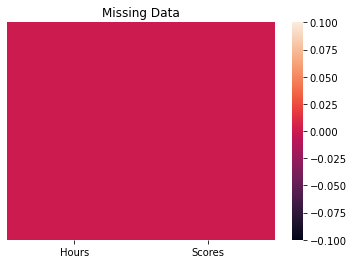

In [20]:
#missing values checking
sns.heatmap(Data.isnull(),yticklabels = False)
plt.title('Missing Data')

## PreProcessing of the data

In [5]:
#checking for data types and missing values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#statistical analysis of the data 
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

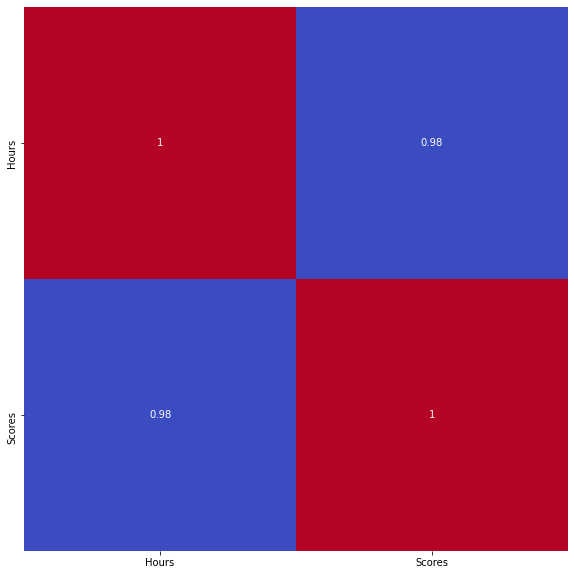

In [22]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(Data.corr(method="pearson"),annot=True,fmt ='.2g',square=True,cmap='coolwarm',cbar=False,ax=ax)

## Visualization of the data

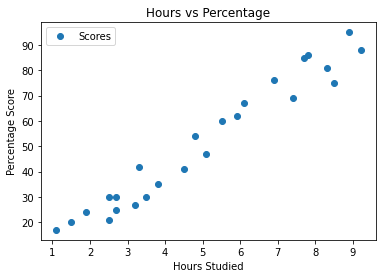

In [8]:
# Plotting the distribution of scores
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

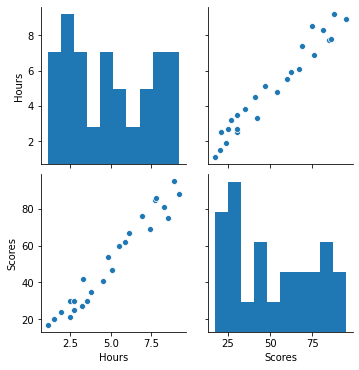

In [9]:
sns.pairplot(Data)

<AxesSubplot:xlabel='Scores'>

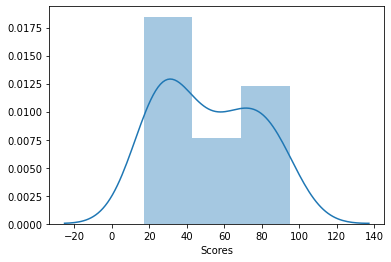

In [10]:
#to ensure the normal distribution 
sns.distplot(Data["Scores"])

# Trainning phase

In [11]:
#splitting the data into independent and dependent features
X=Data.iloc[:,:-1]  #independent data
Y=Data.iloc[:,1] #dependent data

In [12]:
#train test split using sklearn
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0) #splititng data randomly 

In [13]:
from sklearn.linear_model  import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

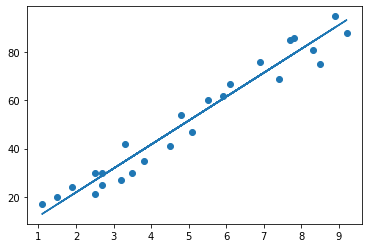

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

## Prediction for the test data

In [15]:
y_predicted=regressor.predict(X_test)
y_predicted

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

Comparing the predicted value with the actual valuem

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df 

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


### Prediction for custom data

In [17]:
given_hour=9.5
result=regressor.predict([[9.25]])
print("For {} hours the score is {}".format(given_hour,result[0]))

For 9.5 hours the score is 93.89272889341655


## Evaluating the model

MSE-MEAN SQUARED ERROR

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predicted)) 

Mean Absolute Error: 4.130879918502486


RMSE-ROOT MEAN SQUARED ERROR

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from math import sqrt

print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('r2_score:',r2_score(y_test, y_predicted))

MAE: 4.130879918502486
MSE: 20.33292367497997
RMSE: 4.5092043283688055
r2_score: 0.9367661043365055
